In [196]:
import matplotlib.pyplot as plt
import numpy as np
%pylab inline
%matplotlib inline

currentData = np.loadtxt("currentGrid.csv", delimiter=',')
futureData  = np.loadtxt("oneHourGrid.csv", delimiter=',')

topNorth = currentData[0][1]
topSouth = currentData[-1][1]
topEast  = currentData[0][0]
topWest  = currentData[-1][0]


def parse(data, csvIndex):
    result = []
    resultLine = []
    lat = 0.0
    for line in data:
        if line[1] != lat:
            result.append(resultLine)
            resultLine = []
            lat = line[1]
        else:
            resultLine.append(line[csvIndex])

    result.pop(0)
    return result


def plotData(data, name):
    fig = plt.figure(figsize=(10,4))
    fig.suptitle(name, fontsize=20)
    plt.xlabel('longitude', fontsize=18)
    plt.ylabel('latitude', fontsize=16)
    im = plt.imshow(data, cmap='hot', interpolation='nearest', extent=[topWest, topEast, topSouth, topNorth])
    plt.colorbar(im, fraction=0.02)
    fig.savefig("plots/" + name.replace(" ", "_") + ".jpg")
    

def diffSets(first, second):
    result = []
    for firstList, secondList in zip(first, second):
        line = []
        for firstElem, secondElem in zip(firstList, secondList):
            line.append(secondElem - firstElem)
        result.append(line)
    return result


currentTemperature = parse(currentData, 2)
currentPresure     = parse(currentData, 3)
currentHumidity    = parse(currentData, 4)

futureTemperature = parse(futureData, 2)
futurePresure     = parse(futureData, 3)
futureHumidity    = parse(futureData, 4)

diffTemperature = diffSets(currentTemperature, futureTemperature)
diffPresure     = diffSets(currentPresure, futurePresure)
diffHumidity    = diffSets(currentHumidity, futureHumidity)

Populating the interactive namespace from numpy and matplotlib


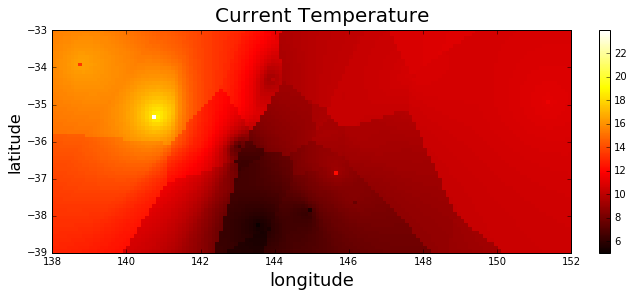

In [197]:
plotData(currentTemperature, "Current Temperature")

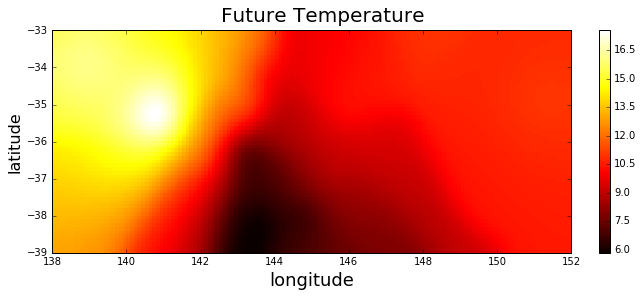

In [198]:
plotData(futureTemperature, "Future Temperature")

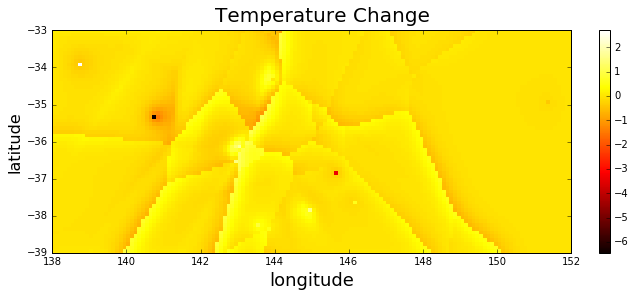

In [199]:
plotData(diffTemperature, "Temperature Change")

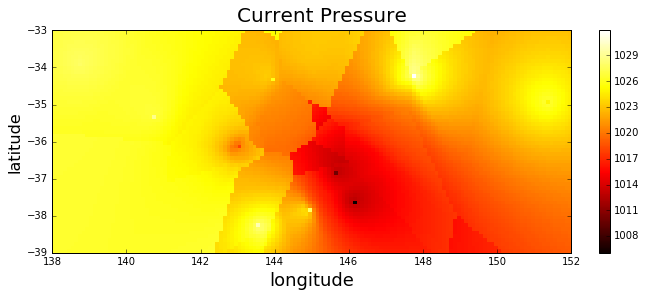

In [200]:
plotData(currentPresure, "Current Pressure")

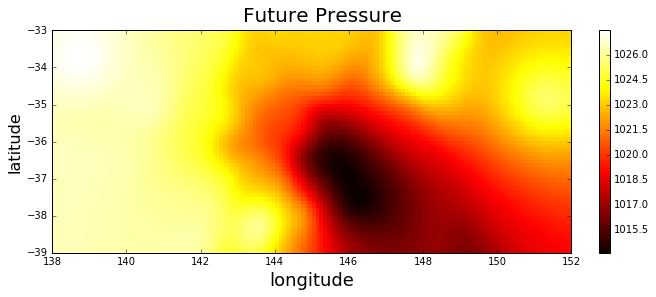

In [201]:
plotData(futurePresure, "Future Pressure")

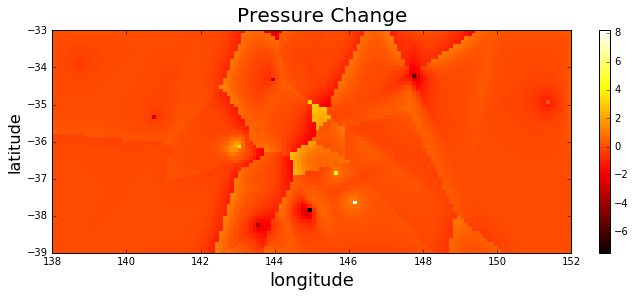

In [202]:
plotData(diffPresure, "Pressure Change")

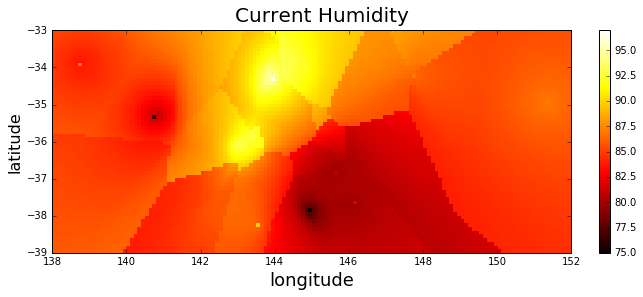

In [203]:
plotData(currentHumidity, "Current Humidity")

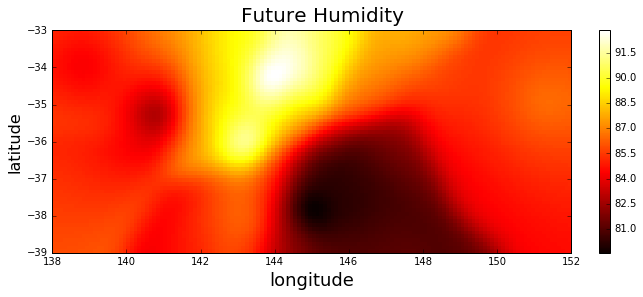

In [204]:
plotData(futureHumidity, "Future Humidity")

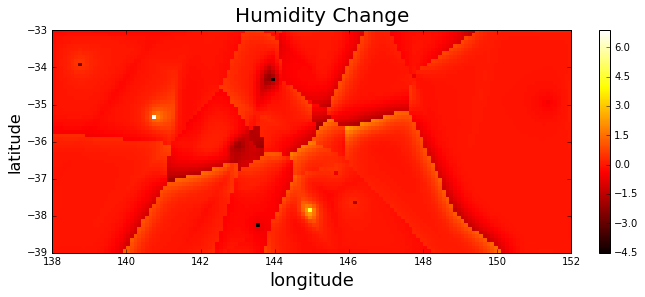

In [205]:
plotData(diffHumidity, "Humidity Change")